In [1]:
# root directory
root_path = f"../../../../"

In [2]:
import pandas as pd

In [3]:
# Load data
df_mx_solvent_data_labeled = pd.read_pickle(f"{root_path}/data/updated/dataset_mx_additive_solvent_hsp.pkl")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(3726, 80)


,mx,inchikey_additive,inchikey_solvent,label,gap_oh,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,...,heavy_atom_count_additive,isotope_atom_count_additive,atom_stereo_count_additive,bond_stereo_count_additive,covalent_unit_count_additive,solvent,additive,method_hf,method_licl/hf,method_lif/hcl
0,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,HEDRZPFGACZZDS-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,chloroform,dodecylphosphonic acid,False,False,True
1,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,ZSIAUFGUXNUGDI-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,hexan-1-ol,dodecylphosphonic acid,False,False,True
2,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WYURNTSHIVDZCO-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,oxolane,dodecylphosphonic acid,False,False,True
3,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,CSCPPACGZOOCGX-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,propan-2-one,dodecylphosphonic acid,False,False,True
4,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,acetonitrile,dodecylphosphonic acid,False,False,True


In [4]:
cols_to_keep = [col for col in df_mx_solvent_data_labeled.columns if not (df_mx_solvent_data_labeled[col].nunique() <= 1)]
df_mx_solvent_data_labeled = df_mx_solvent_data_labeled[cols_to_keep]

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [6]:
df_mx_solvent_data_labeled['method_hf'] = df_mx_solvent_data_labeled['method_hf'].astype('category').cat.codes
df_mx_solvent_data_labeled['method_licl/hf'] = df_mx_solvent_data_labeled['method_licl/hf'].astype('category').cat.codes
df_mx_solvent_data_labeled['method_lif/hcl'] = df_mx_solvent_data_labeled['method_lif/hcl'].astype('category').cat.codes

In [7]:
df_mx_solvent_data_labeled.head()

,mx,inchikey_additive,inchikey_solvent,label,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,alphaz_el_oh,...,rotatable_bond_count_additive,heavy_atom_count_additive,atom_stereo_count_additive,bond_stereo_count_additive,covalent_unit_count_additive,solvent,additive,method_hf,method_licl/hf,method_lif/hcl
0,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,HEDRZPFGACZZDS-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,chloroform,dodecylphosphonic acid,0,0,1
1,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,ZSIAUFGUXNUGDI-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,hexan-1-ol,dodecylphosphonic acid,0,0,1
2,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WYURNTSHIVDZCO-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,oxolane,dodecylphosphonic acid,0,0,1
3,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,CSCPPACGZOOCGX-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,propan-2-one,dodecylphosphonic acid,0,0,1
4,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,acetonitrile,dodecylphosphonic acid,0,0,1


In [8]:
df_mx_solvent_data_labeled.columns

Index(['mx', 'inchikey_additive', 'inchikey_solvent', 'label',
       'work_function_oh', 'formation_energy_oh', 'ehull_oh', 'alphax_el_oh',
       'alphay_el_oh', 'alphaz_el_oh', 'plasmafrequency_x_oh',
       'plasmafrequency_y_oh', 'has_inversion_symmetry_oh', 'gap_o',
       'work_function_o', 'formation_energy_o', 'ehull_o', 'alphax_el_o',
       'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o',
       'plasmafrequency_y_o', 'has_inversion_symmetry_o', 'work_function_f',
       'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f',
       'alphaz_el_f', 'plasmafrequency_x_f', 'plasmafrequency_y_f',
       'has_inversion_symmetry_f', 'delta_d', 'delta_p', 'delta_h',
       'molar_volume', 'molecular_weight', 'xlogp', 'tpsa', 'complexity',
       'h_bond_donor_count', 'h_bond_acceptor_count', 'rotatable_bond_count',
       'heavy_atom_count', 'atom_stereo_count', 'boiling_point',
       'molecular_weight_additive', 'xlogp_additive', 'tpsa_additive',
       'complexity_add

In [9]:
features = ['work_function_oh', 'formation_energy_oh', 'ehull_oh', 'alphax_el_oh',
       'alphay_el_oh', 'alphaz_el_oh', 'plasmafrequency_x_oh',
       'plasmafrequency_y_oh', 'has_inversion_symmetry_oh', 'gap_o',
       'work_function_o', 'formation_energy_o', 'ehull_o', 'alphax_el_o',
       'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o',
       'plasmafrequency_y_o', 'has_inversion_symmetry_o', 'work_function_f',
       'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f',
       'alphaz_el_f', 'plasmafrequency_x_f', 'plasmafrequency_y_f',
       'has_inversion_symmetry_f', 'delta_d', 'delta_p', 'delta_h',
       'molar_volume',
       'molecular_weight', 'xlogp', 'tpsa', 'complexity', 'h_bond_donor_count',
       'h_bond_acceptor_count', 'rotatable_bond_count', 'heavy_atom_count',
       'atom_stereo_count', 'boiling_point', 'molecular_weight_additive',
       'xlogp_additive', 'tpsa_additive', 'complexity_additive',
       'h_bond_donor_count_additive', 'h_bond_acceptor_count_additive',
       'rotatable_bond_count_additive', 'heavy_atom_count_additive',
       'atom_stereo_count_additive', 'bond_stereo_count_additive',
       'covalent_unit_count_additive', 'method_hf',
       'method_licl/hf', 'method_lif/hcl']
X = df_mx_solvent_data_labeled[features]
y = df_mx_solvent_data_labeled['label']

In [10]:
X.head()

,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,alphaz_el_oh,plasmafrequency_x_oh,plasmafrequency_y_oh,has_inversion_symmetry_oh,gap_o,...,h_bond_donor_count_additive,h_bond_acceptor_count_additive,rotatable_bond_count_additive,heavy_atom_count_additive,atom_stereo_count_additive,bond_stereo_count_additive,covalent_unit_count_additive,method_hf,method_licl/hf,method_lif/hcl
0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
2,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
3,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
4,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1


In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def plot_feature_distributions(data, features, title, plots_per_row=4):
    num_features = len(features)
    num_rows = (num_features + plots_per_row - 1) // plots_per_row
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 4, num_rows * 3))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.histplot(data[feature], kde=True, ax=axes[i], bins=30, color='skyblue')
        axes[i].set_title(f"{title}: {feature}")

    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

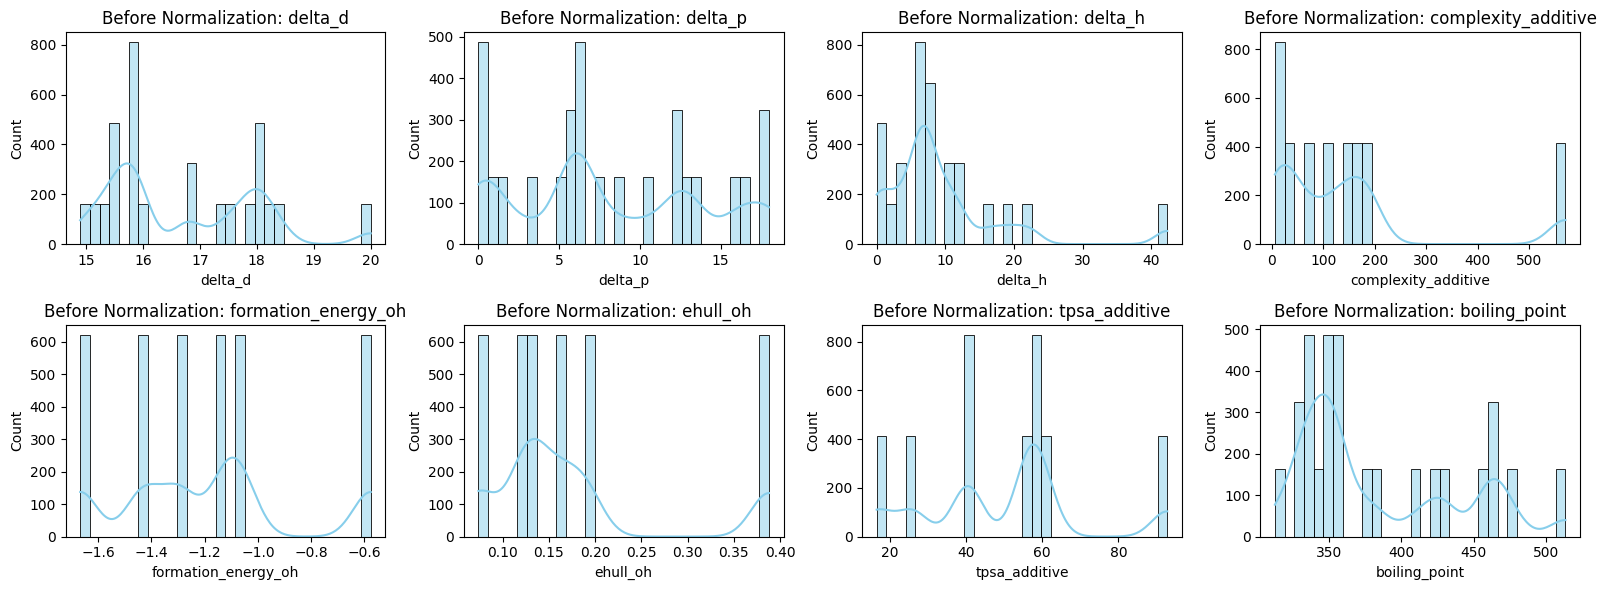

In [14]:
plot_feature = ['delta_d', 'delta_p', 'delta_h',
       'complexity_additive',
   'formation_energy_oh','ehull_oh', 'tpsa_additive',
   'boiling_point']
plot_feature_distributions(X, plot_feature, "Before Normalization")

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

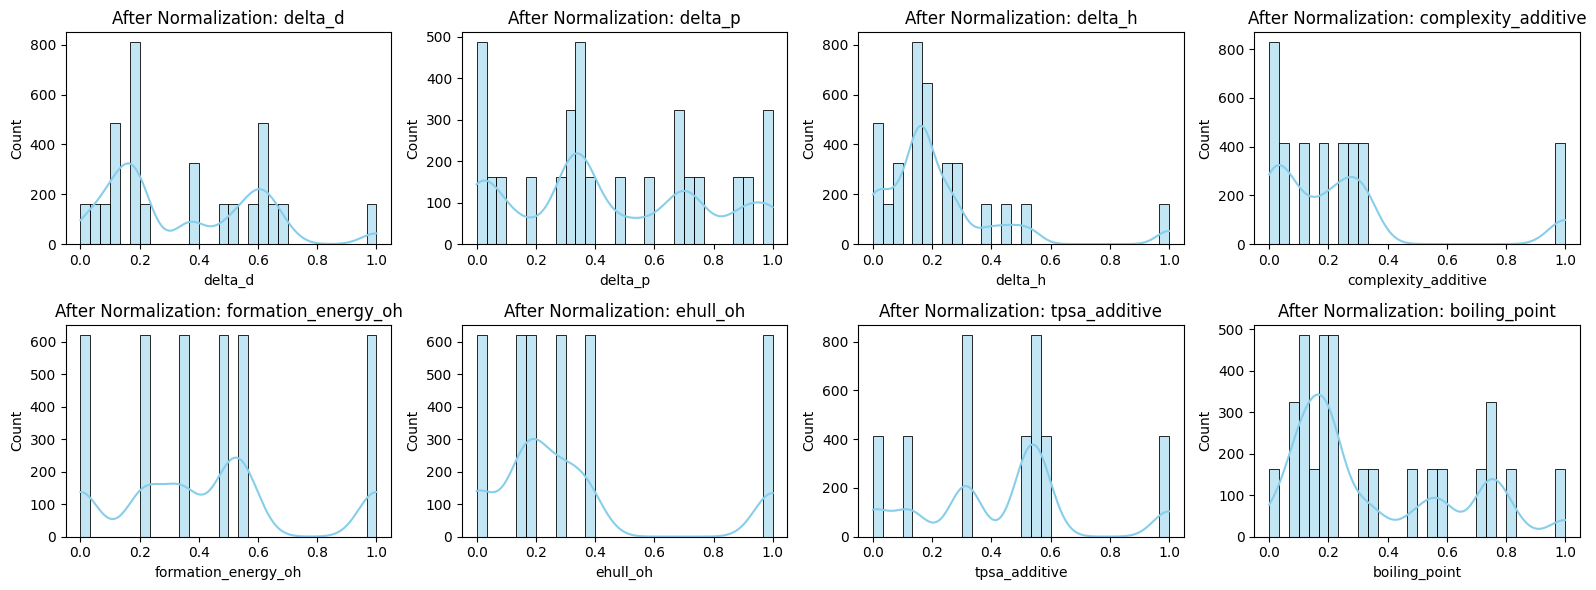

In [17]:
plot_feature_distributions(X_scaled_df, plot_feature, "After Normalization")

In [18]:
mask_pos = y == 1
mask_neg = y == -1
mask_unlabeled = y == 0


In [19]:
from sklearn.impute import KNNImputer

In [20]:
# impute missing data entries using K nearest neighbors
imputer = KNNImputer()
X_impute = imputer.fit_transform(X_scaled)

In [49]:
# PCA for inputs
pca = PCA(n_components=None, random_state=42)
pca.fit(X_impute)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42


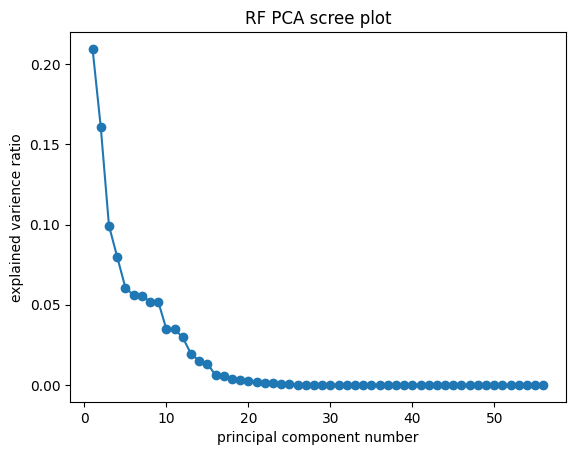

In [50]:
# scree plot
explained_variance = pca.explained_variance_ratio_
component_numbers = np.arange(len(explained_variance)) + 1
plt.plot(component_numbers, explained_variance, marker='o')
plt.xlabel('principal component number')
plt.ylabel('explained varience ratio')
plt.title('RF PCA scree plot')
# plt.xticks(np.arange(0, 50, step=2))
plt.show()

In [ ]:
pca = PCA(n_components=16, random_state=42)
X_pca = pca.fit_transform(X_impute)

In [38]:
X_train = X_pca[mask_pos | mask_neg]
y_train = y[mask_pos | mask_neg]

In [39]:
X_test = X_pca[mask_unlabeled]
df_unlabeled = df_mx_solvent_data_labeled[mask_unlabeled].copy()

In [40]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [41]:
print(len(X_train_train))
print(len(X_val))
print(len(y_train_train))
print(len(y_val))

48
13
48
13


In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [43]:
param_grid = {
    'n_estimators': [10, 25, 100],
    'max_samples': [0.8, 1.0]
}

In [44]:
base_rf = RandomForestClassifier(random_state=42)
bagging_clf = BaggingClassifier(estimator=base_rf, random_state=42)

In [45]:
rand_search = RandomizedSearchCV(bagging_clf, param_grid, cv=5, n_jobs=1, scoring='accuracy', verbose=2)
rand_search.fit(X_train_train, y_train_train)


c:\Users\liamr\Documents\Repos\MXene_Solvent\myenv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\liamr\Documents\Repos\MXene_Solvent\myenv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...................max_samples=0.8, n_estimators=10; total time=   0.6s
[CV] END ...................max_samples=0.8, n_estimators=10; total time=   0.5s
[CV] END ...................max_samples=0.8, n_estimators=10; total time=   0.6s
[CV] END ...................max_samples=0.8, n_estimators=10; total time=   0.5s
[CV] END ...................max_samples=0.8, n_estimators=10; total time=   0.5s
[CV] END ...................max_samples=0.8, n_estimators=25; total time=   1.4s
[CV] END ...................max_samples=0.8, n_estimators=25; total time=   1.8s
[CV] END ...................max_samples=0.8, n_estimators=25; total time=   1.9s
[CV] END ...................max_samples=0.8, n_estimators=25; total time=   2.3s
[CV] END ...................max_samples=0.8, n_estimators=25; total time=   2.1s
[CV] END ..................max_samples=0.8, n_estimators=100; total time=   8.0s
[CV] END ..................max_samples=0.8, n_est

,estimator,BaggingClassi...ndom_state=42)
,param_distributions,"{'max_samples': [0.8, 1.0], 'n_estimators': [10, 25, ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [46]:
best_model = rand_search.best_estimator_
print(best_model)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  n_estimators=25, random_state=42)


In [47]:
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Val Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Report:\n", classification_report(y_val, y_val_pred))

Train Accuracy: 0.9836065573770492
Val Accuracy: 0.9230769230769231
Validation Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           1       0.92      1.00      0.96        12

    accuracy                           0.92        13
   macro avg       0.46      0.50      0.48        13
weighted avg       0.85      0.92      0.89        13



c:\Users\liamr\Documents\Repos\MXene_Solvent\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\liamr\Documents\Repos\MXene_Solvent\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\liamr\Documents\Repos\MXene_Solvent\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [51]:
proba_unlabeled = best_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive)
df_unlabeled['predicted_proba'] = proba_unlabeled
df_unlabeled['predicted_label'] = (proba_unlabeled >= 0.5).astype(int)

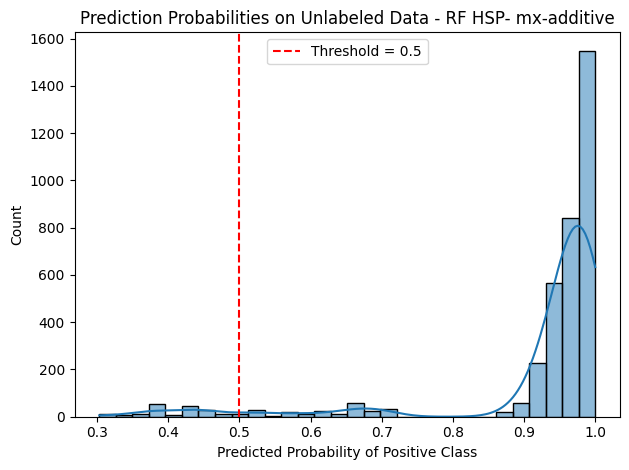

In [52]:
sns.histplot(proba_unlabeled, bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Prediction Probabilities on Unlabeled Data - RF HSP- mx-additive")
plt.xlabel("Predicted Probability of Positive Class")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
high_conf = high_conf[high_conf['predicted_proba'] < 0.99]
top_10 = high_conf.sort_values(by='predicted_proba', ascending=False).head(20)
print(top_10[['solvent', 'mx', 'additive','predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

             solvent     mx  \
85      propan-2-one  Ti3C2   
1277    propan-2-one  Nb2C1   
657     propan-2-one  Ti2C1   
1897    propan-2-one   V2C1   
2517    propan-2-one  Mo2C1   
3137    propan-2-one  Ti4N3   
3186  methyl acetate  Ti4N3   
706   methyl acetate  Ti2C1   
1946  methyl acetate   V2C1   
2566  methyl acetate  Mo2C1   
1326  methyl acetate  Nb2C1   
126   methyl acetate  Ti3C2   
887    ethyl acetate  Ti2C1   
3368   ethyl acetate  Ti4N3   
2748   ethyl acetate  Mo2C1   
1508   ethyl acetate  Nb2C1   
2128   ethyl acetate   V2C1   
293    ethyl acetate  Ti3C2   
682    ethyl acetate  Ti2C1   
3162   ethyl acetate  Ti4N3   

                                               additive  predicted_proba  \
85                             (Z)-octadec-9-en-1-amine           0.9900   
1277                           (Z)-octadec-9-en-1-amine           0.9900   
657                            (Z)-octadec-9-en-1-amine           0.9900   
1897                           (Z)-octadec-9

In [54]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.4]
bottom_10 = low_conf.sort_values(by='predicted_proba', ascending=True).head(20)

print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):")
print(bottom_10[['solvent', 'mx', 'additive','predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):
                    solvent     mx                        additive  \
1761                ethanol  Nb2C1  benzyl(methyl)azanium;chloride   
545                methanol  Ti3C2  benzyl(methyl)azanium;chloride   
1141                ethanol  Ti2C1  benzyl(methyl)azanium;chloride   
3621                ethanol  Ti4N3  benzyl(methyl)azanium;chloride   
3001                ethanol  Mo2C1  benzyl(methyl)azanium;chloride   
2381                ethanol   V2C1  benzyl(methyl)azanium;chloride   
3630               methanol  Ti4N3  benzyl(methyl)azanium;chloride   
1150               methanol  Ti2C1  benzyl(methyl)azanium;chloride   
1770               methanol  Nb2C1  benzyl(methyl)azanium;chloride   
3010               methanol  Mo2C1  benzyl(methyl)azanium;chloride   
2390               methanol   V2C1  benzyl(methyl)azanium;chloride   
1815                 hexane  Nb2C1  benzyl(methyl)azanium;chloride   
3675                 hexane  T

In [55]:
print("\n=== Summary of predicted probabilities on unlabeled data ===")
print(df_unlabeled['predicted_proba'].describe())

# Count how many samples fall into different confidence zones
bins = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
labels = ['Very Low (≤0.1)', 'Low (0.1–0.3)', 'Mid (0.3–0.5)',
          'High (0.5–0.7)', 'Very High (0.7–0.9)', 'Extremely High (>0.9)']

df_unlabeled['confidence_bin'] = pd.cut(df_unlabeled['predicted_proba'], bins=bins, labels=labels, include_lowest=True)
print("\n=== Prediction count by confidence bin ===")
print(df_unlabeled['confidence_bin'].value_counts().sort_index())


=== Summary of predicted probabilities on unlabeled data ===
count    3665.000000
mean        0.920144
std         0.145240
min         0.303200
25%         0.943600
50%         0.970400
75%         0.988400
max         0.999600
Name: predicted_proba, dtype: float64

=== Prediction count by confidence bin ===
confidence_bin
Very Low (≤0.1)             0
Low (0.1–0.3)               0
Mid (0.3–0.5)             176
High (0.5–0.7)            205
Very High (0.7–0.9)        77
Extremely High (>0.9)    3207
Name: count, dtype: int64


In [56]:
df_unlabeled.to_csv(f"003_p_vs_n_predictions_unlabeled_rf-normalize-fintune-mxadd.csv")
df_unlabeled.to_pickle(f"003_p_vs_n_predictions_unlabeled_rf-normalize-fintune-mxadd.pkl")
